In [1]:
import matplotlib.pyplot as plt
from deap.tools import Logbook
from typing import Callable, TypeVar
import pickle, os

In [2]:
def plot(logbook: Logbook) -> None:
    gen = logbook.select("gen")

    size_avgs = logbook.chapters["size"].select("avg")

    fig, axs = plt.subplots(2, 2)
    combinations = zip(["min", "max", "avg"], ["red", "green", "blue"])

    for ax, (setting, color) in zip(axs.flat, combinations):
        ax.plot(gen, logbook.chapters["fitness"].select(setting),
                color=color, label=f"fitness_{setting}")
        ax.set_title(f"Fitness {setting}")
        ax.set(xlabel='x-label', ylabel='y-label')
    axs[1,1].plot(gen, size_avgs, color="orange")
    axs[1,1].set_title("Average Size")
    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.set(xlabel="generations", ylabel="fitness")
        # ax.label_outer()
    axs[1,1].set(ylabel="size")
    plt.show()


In [8]:
from typing import Iterable

T = TypeVar('T')
def retrieve_from_files(extractor: Callable[[Logbook], T], files: Iterable[str]) -> list[T]:
    result = []
    for file_path in files:
        with open(file_path, 'rb') as file:
            result.append(extractor(pickle.load(file)))
    return result

def plot_across_all_models(model: str, extractor: Callable[[Logbook], T], title: str) -> None:
    for result in retrieve_from_files(
        extractor,
        (f"{model}/data/{name}" for name in os.listdir(f"{model}/data"))
    ):
        print(result)
        plt.plot(result)
    plt.title(title)
    plt.show()



[np.float64(0.5639841526114194), np.float64(0.5427426840527246), np.float64(0.5427426840527246)]


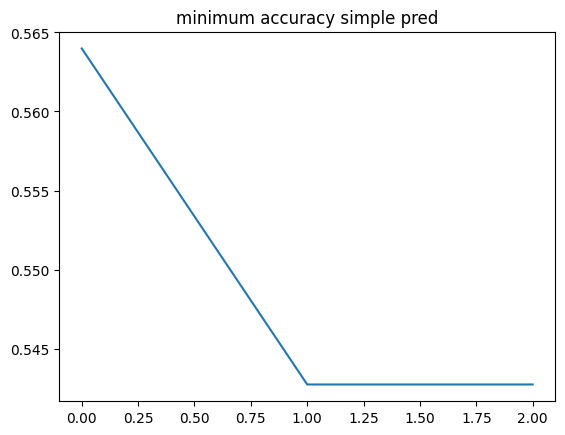

[np.float64(55.0), np.float64(57.5), np.float64(59.0)]


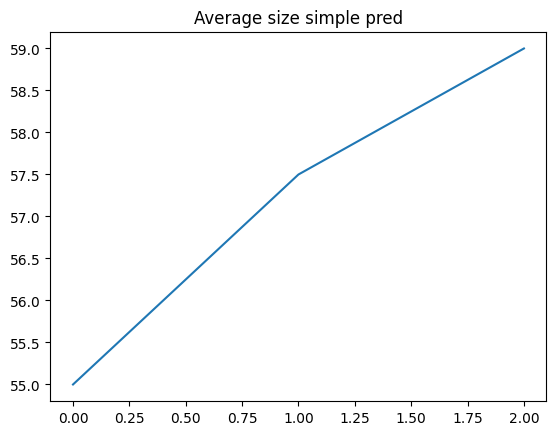

In [9]:
plot_across_all_models('simple_pred', lambda r: r.log.chapters["fitness"].select('min'), title="minimum accuracy simple pred")
plot_across_all_models('simple_pred', lambda r: r.log.chapters["size"].select('avg'), title="Average size simple pred")
